<a href="https://colab.research.google.com/github/tharuni777/kalahasthi-tharu/blob/master/Comparing_Regression_red_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/winequality-red.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
X = dataset.iloc[: ,:-1].values
y = dataset.iloc[:, -1].values

##Split to Train and Test Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##Train on Different Algorithms

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
m_reg = LinearRegression()
p_reg = LinearRegression()
d_reg = DecisionTreeRegressor()
r_reg = RandomForestRegressor(n_estimators=500)

In [9]:
X_poly = PolynomialFeatures(degree = 5)
X_poly = X_poly.fit_transform(X_train)

In [10]:
m_reg.fit(X_train, y_train)
p_reg.fit(X_poly,y_train)
d_reg.fit(X_train, y_train)
r_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [11]:
temp = PolynomialFeatures(degree = 5)
temp = temp.fit_transform(X_test)

In [12]:
m_pred = m_reg.predict(X_test)
p_pred = p_reg.predict(temp)
d_pred = d_reg.predict(X_test)
r_pred = r_reg.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

In [14]:
m = r2_score(y_test, m_pred)
p = r2_score(y_test, p_pred)
d = r2_score(y_test, d_pred)
r = r2_score(y_test, r_pred)

In [15]:
print(m, p, d, r)

0.2615821459355637 -170163.41495380132 0.08541277344179399 0.4650157395687746


In [16]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [17]:
dataset.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Text(0, 0.5, 'alcohol')

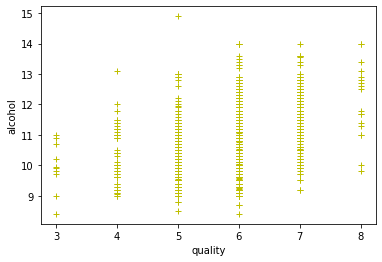

In [26]:
plt.plot(dataset['quality'], dataset['alcohol'], 'y+')
plt.xlabel('quality')
plt.ylabel('alcohol')

In [27]:
cond = [(dataset['quality']>=7.5), (dataset['quality']<7.5)]
gb = ['Good', 'Bad']
dataset['review'] = np.select(cond, gb)

In [28]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad


In [29]:
dataset.iloc[430:450, :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
430,10.5,0.240,0.47,2.10,0.066,6.0,24.0,0.9978,3.15,0.90,11.0,7,Bad
431,7.8,0.550,0.35,2.20,0.074,21.0,66.0,0.9974,3.25,0.56,9.2,5,Bad
432,11.9,0.370,0.69,2.30,0.078,12.0,24.0,0.9958,3.00,0.65,12.8,6,Bad
433,12.3,0.390,0.63,2.30,0.091,6.0,18.0,1.0004,3.16,0.49,9.5,5,Bad
434,10.4,0.410,0.55,3.20,0.076,22.0,54.0,0.9996,3.15,0.89,9.9,6,Bad
435,12.3,0.390,0.63,2.30,0.091,6.0,18.0,1.0004,3.16,0.49,9.5,5,Bad
436,8.0,0.670,0.30,2.00,0.060,38.0,62.0,0.9958,3.26,0.56,10.2,6,Bad
437,11.1,0.450,0.73,3.20,0.066,6.0,22.0,0.9986,3.17,0.66,11.2,6,Bad
438,10.4,0.410,0.55,3.20,0.076,22.0,54.0,0.9996,3.15,0.89,9.9,6,Bad
439,7.0,0.620,0.18,1.50,0.062,7.0,50.0,0.9951,3.08,0.60,9.3,5,Bad


Since random forest is giving a better efficiency than compared to others, we are considering the best algorithm for this dataset(using regression) to be random forest.